# Amostragem de sinais

Para os fins deste curso, um sinal será definido como uma variação de alguma propriedade mensurável existente no mundo. Assim, a temperatura de uma sala pode ser considerada como um sinal ao longo do tempo. A posição de uma bola de futebol também pode ser estudada como um sinal -- tridimensional -- ao longo do tempo. Uma imagem, por sua vez, pode ser vista como um sinal de cor (representado em padrões como RGB ou HSV) que se espalha num espaço bi-dimensional. Neste curso, estamos especialmente interessados em sinais acústicos, que são variações da pressão do ar que se propagam no espaço ao longo do tempo.

O sinal acústico pode ser transformado em um sinal elétrico (uma variação de tensão elétrica) usando um dispositivo adequado -- o microfone. Pode, então, ser amplificado usando técnicas de eletrônica e, então, transformado novamente em um sinal acústico usando um alto-falante. Além do processo de amplificação, é possível inserir diversas transformações na cadeia de processamento do sinal acústico: a equalização e a compressão são dois exemplos bastante comuns.

Nesta interação, analisaremos como é possível inserir um computador digital (usando o paradigma da Máquina de Turing) nessa cadeia de efeitos. Essa inserção é interessante porque o computador digital, sendo um simulador universal, pode prover um grande leque de formas de processamento de áudio, incluindo formas que não seriam possíveis usando apenas equipamento analógico.

## Objetivos
Ao final desta iteração, o estudante deverá ser capaz de:
1. Compreender os modelos matemáticos envolvidos no processo de amostragem
1. Compreender o conceito de *frequência de amostragem*
1. Compreender os conceitos de *sinal contínuo* e de *sinal discreto*
1. Aplicar um processo de amostragem para representar adequadamente um sinal contínuo como um sinal discreto
1. Analisar os impactos da escolha de parâmetros para processos de amostragem



## Uma forma matemática para a amostragem

Um sinal acústico no domínio do tempo será chamado de $x(t)$. Trata-se de um sinal contínuo, e, portanto, valem para $x(t)$ todas as propriedades típicas de funções contínuas. No processo de amostragem, valores de $x(t)$ em instantes de tempo discreto são associados a uma sequência $x[n]$. Para áudio, é comum utilizar amostragem com uma frequência $f_s$ (em Hz) fixa, de forma que:

$$x[n] = x(\frac{n}{f_s})$$

Essa propriedade pode ser utilizada para criar gráficos digitais. Podemos escolher, por exemplo, que gostaríamos de criar uma representação gráfica da função $\cos(2 \pi t)$. Se nossa frequência de amostragem é $f_s = 100$ Hz, então o sinal amostrado será dado por $x[n] = \cos(2 \pi \frac{n}{100})$, levando ao seguinte código:

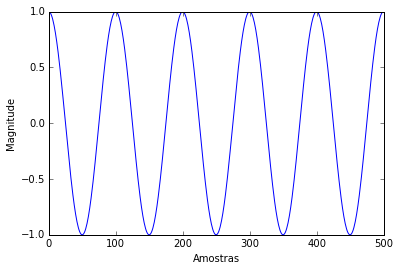

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fs = 100.
Tmax = 5 # Tempo (segundos) que gostariamos de representar
N = fs * Tmax # Numero de amostras que precisamos para representar Tmax segundos do sinal

n = np.linspace(0, N, N-1)
x = np.cos(2 * np.pi * n / fs)

plt.plot(n, x)
plt.xlabel('Amostras')
plt.ylabel('Magnitude')
plt.show()

### Exercícios

1. Usando o código acima, reduza a taxa de amostragem para 10% do seu valor inicial. O que acontece com o aspecto do sinal? Após, realize novamente a redução da taxa de amostragem e analize o aspecto do sinal por algumas vezes.

2. Faça o mesmo, mas desta vez multiplicando a taxa de amostragem por 2, até que a taxa chegue a 8 vezes o valor inicial. O que pode ser observado no aspecto do sinal em cada um desses casos?

3. Se cada amostra pode ser representada no computador usando o tipo float, que ocupa 4 bytes, calcule quanta memória é necessária para armazenar cada um dos sinais sintetizados nos dois ítens acima.

## Linearidade da amostragem

Uma importante propriedade matemática da amostragem é a *linearidade*. Um *sistema linear* é aquele em que uma combinação linear de entradas leva a uma combinação linear semelhante de saídas, isto é, se:

$$f(x_1(t)) = y_1(t)$$
e
$$f(x_2(t)) = y_2(t)$$

então, para quaisquer constantes reais $a_1$ e $a_2$, temos:
$$f(a_1 x_1(t) + a_2 x_2(t)) = a_1 y_1(t) + a_2 y_2(t)$$

No caso da amostragem, sabemos que $x[n] = x(n/f_s)$.
Se $x(t) = a_1 x_1(t) + a_2 x_2(t)$, então:

$$ x[n] = x(n/_fs)$$
$$ = a_1 x_1 (n/fs) + a_2 x_2(n/fs) $$
$$ = a_1 x_1[n] + a_2 x_2[n]$$

e, portanto, a amostragem é um processo linear.

### Exercício

Escolha duas funções arbitrárias, $x_1(t)$ e $x_2(t)$. Utilize-as como base para demonstrar a linearidade do processo de amostragem através de um programa de computador.

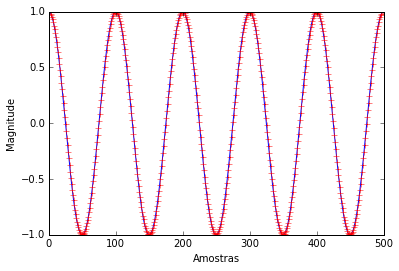

In [38]:
# Crie aqui seu programa para demonstrar a linearidade do processo de amostragem. Se precisar,
# tome por base o codigo para amostragem de um sinal simples:
fs = 100.
Tmax = 5 # Tempo (segundos) que gostariamos de representar
N = fs * Tmax # Numero de amostras que precisamos para representar Tmax segundos do sinal

n = np.linspace(0, N, N-1)
x = np.cos(2 * np.pi * n / fs)

plt.plot(n, x)
plt.plot(n, x, 'r+')
plt.xlabel('Amostras')
plt.ylabel('Magnitude')
plt.show()

## Frequência de amostragem
Neste momento, deve estar claro que:
1. Uma frequência de amostragem muito alta leva ao uso de muita memória
2. Uma frequência de amostragem muito baixa piora a representação do sinal

Por isso, gostaríamos que a frequência de amostragem fosse tão baixa quanto possível, de forma que possamos representar adequadamente nosso sinal e, ao mesmo tempo, possamos economizar recursos computacionais (memória e processamento) nessa representação.

### Discussão sobre a bijeção da amostragem
Proponho aqui uma pergunta: o processo de amostragem é **bijetor**? Isto é, para cada uma frequência de amostragem fixa $f_s$, o processo obedece simultaneamente às condições:

1. Cada sinal contínuo $x(t)$ é representado por apenas uma sequência $x[n]$, e
2. Cada sequência discreta $x[n]$ representa apenas um sinal contínuo $x(t)$.

A primeira condição pode ser observada pela construção do processo de amostragem. A segunda condição, porém, precisa de uma análise mais cuidadosa.

Vamos supor dois sinais cossenoidais diferentes, com diferentes frequências $f_1$ e $f_2$. Eles são amostrados a uma frequência $f_s$, gerando as sequências $x_1[n]$ e $x_2[n]$. Queremos determinar em que condições $x_1[n] = x_2[n]$ para todo $n$ inteiro. Assim:

$$x_1[n] = x_2[n]$$
$$\cos(2 \pi f_1 n/f_s) = \cos (2 \pi f_2 n/f_s)$$

A função $\cos(2 \pi f_1 n/f_s)$ é periódica em relação a $f_1$ com frequência $1/f_s$ (e, assim, período $f_s$). Portanto, a identidade acima se mantém sempre que $f_2 = f_1 + k f_s$, para todo $k$ inteiro. Assim:

$$\cos(2 \pi f_1 n/f_s) = \cos (2 \pi (f_1 + k f_s) n/f_s)$$

Também, sabemos que a função cosseno é par, e que portanto uma possível solução da identidade cossenoidal é $f_1 = -f_2$. Não se trata de uma solução muito boa para nós, porque não há significado físico para uma frequência negativa. Porém, podemos aplicar a propriedade da periodicidade do cosseno à partir dessa frequência negativa, obtendo: 

$$\cos(2 \pi f_1 n/f_s) = \cos (2 \pi (-f_1 + k f_s) n/f_s)$$

Juntando as duas identidades temos, finalmente:
$$\cos(2 \pi f_1 n/f_s) = \cos (2 \pi (\pm f_1 + k f_s) n/f_s)$$

e, portanto, sabemos que a identidade é verificada quando $f_2 = k f_s \pm f_1$.

### Exercícios

1. Suponha uma frequência $f_1 = 10$ Hz e uma frequência de amostragem $f_s = 100$ Hz. A sequência $x_1[n]$ contém amostras de $\cos(2\pi f_1 t)$ com frequência de amostragem $f_s$, e $x_2[n]$ foi obtida através da amostragem de $\cos(2\pi f_2 t)$ com mesma frequência de amostragem. Mostre todos os valores de frequência entre 0 e 500 Hz para os quais $x_1[n] = x_2[n]$.
1. Faça o mesmo para $f_1 = 20$ Hz.
1. Faça um programa de computador que mostre as frequências que obedecem às condições da questão 1 para $f_1$ e $f_s$ determinados pelo usuário. Varie os valores de $f_1$ e $f_s$, analisando seu comportamento.
1. Suponha um sinal $x(t) = \cos(2 \pi f t)$, e uma frequência de amostragem $f_s$. Suponha que o valor de $f$ é aumentado progressivamente à partir de 0 Hz, indo até $f_s$. Para cada valor de $f$, a sequência $x_f[n]$ é formada por amostras de $x(t)$, capturadas a uma frequência $f_s$.  À partir de qual valor de $f$ será possível observar sequências $x_f[n]$ que sejam iguais a outras já observadas anteriormente? Após terminar este exercício, discuta com colegas sobre o resultado a que você chegou, e qual foi sua linha da raciocínio para chegar a esse resultado.

In [39]:
# Crie seu programa de computador neste espaço
f1 = 10 # Hz
fs = 100 # Hz
fmax = 500 # Hz